In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv('./dataset/auto-mpg.data', names=col, sep='\s+', na_values='?')

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [3]:
df = df.dropna()

In [4]:
df_pd = pd.get_dummies(df).astype(float)

print(df_pd.shape)

X = df_pd.iloc[:, 1:]
y = df_pd.iloc[:, 0]

(392, 309)


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.optimizers import SGD

In [8]:

model = Sequential([
    Conv1D(input_shape=(X.shape[1], 1), filters=64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 306, 64)           256       
                                                                 
 flatten (Flatten)           (None, 19584)             0         
                                                                 
 dense (Dense)               (None, 64)                1253440   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,257,921
Trainable params: 1,257,921
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, batch_size=32, epochs=500, validation_split=0.33, verbose=1)

Epoch 1/500
7/7 [==============================] - 0s 28ms/step - loss: 2221.9089 - val_loss: 540.3081
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 451.2752 - val_loss: 210.9586
Epoch 3/500
7/7 [==============================] - 0s 16ms/step - loss: 225.7494 - val_loss: 190.0242
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 177.0506 - val_loss: 202.2511
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 176.8545 - val_loss: 169.4684
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 163.0260 - val_loss: 162.2897
Epoch 7/500
7/7 [==============================] - 0s 11ms/step - loss: 157.8088 - val_loss: 153.0111
Epoch 8/500
7/7 [==============================] - 0s 10ms/step - loss: 147.7508 - val_loss: 131.9945
Epoch 9/500
7/7 [==============================] - 0s 9ms/step - loss: 124.4432 - val_loss: 115.0062
Epoch 10/500
7/7 [==============================] - 0s 9ms/step - loss: 112.3694 - 

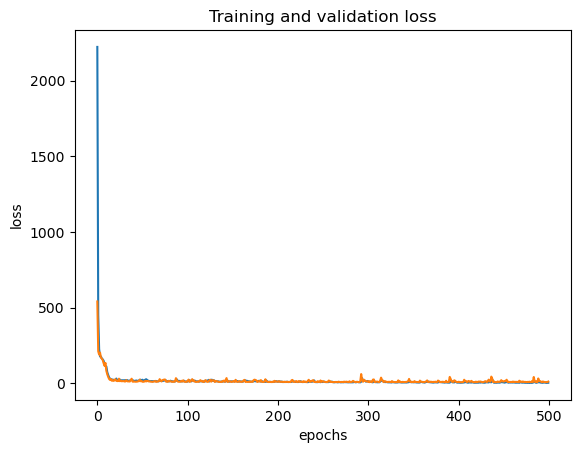

In [10]:
history.history.keys()
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
x = np.arange(0, 100)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

4/4 [==============================] - 0s 2ms/step
(98, 1) (98,)


Text(0, 0.5, 'Count')

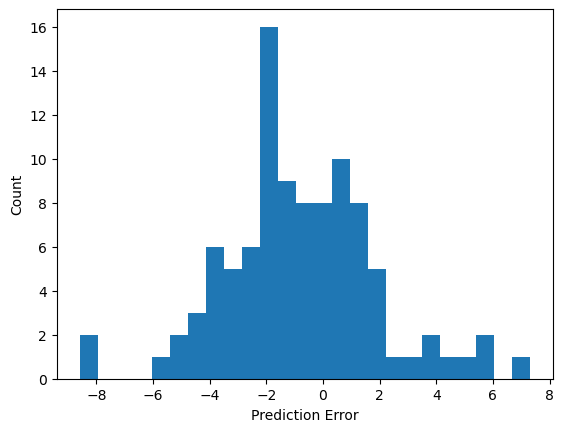

In [11]:
test_pred = model.predict(X_test)
print(test_pred.shape, np.array(y_test).shape)
y_test = np.array(y_test)
y_test = y_test.reshape(y_test.shape[0], 1)
error = test_pred - y_test
plt.hist(error, bins=25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")